# ML 101

This notebook contains the common methods to do dataset pre-processing, cleaning and normalization.

In [34]:
%pip install matplotlib pandas numpy

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading a sample dataset

Let us consider a toy dataset with only four features:
1. Country (String)
2. Age (Int)
3. Salary (Int)
4. Purchased (Yes/No)

In [7]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/mariolpantunes/ml101/main/datasets/data_prep.csv')
# print the first rows of the dataset
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No


In [8]:
# print the last rows of the dataset
df.tail()

,Country,Age,Salary,Purchased
24,France,37.0,23000.0,Yes
25,Germany,45.0,50000.0,No
26,France,37.0,67000.0,Yes
27,Nigeria,30.0,30000.0,Yes
28,Nigeria,29.0,15000.0,No


In [9]:
# viewing statistical info about dataset
df.describe()

,Age,Salary
count,27.000000,28.000000
mean,36.925926,53642.857143
std,8.757089,19216.532785
min,18.000000,15000.000000
25%,30.000000,44750.000000
50%,37.000000,53000.000000
75%,44.000000,67000.000000
max,50.000000,83000.000000


The dataset may contain duplicated rows due to any error on the acquisition.

In [10]:
# dropping duplicate values
duplicate_rows = df[df.duplicated()]
print(f'{duplicate_rows}')
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print(f'{duplicate_rows}')
df.describe()

    Country   Age   Salary Purchased
17    Spain  27.0  48000.0       Yes
22  Germany  50.0  83000.0        No
23   France  37.0  67000.0       Yes
26   France  37.0  67000.0       Yes
Empty DataFrame
Columns: [Country, Age, Salary, Purchased]
Index: []


,Age,Salary
count,23.000000,24.000000
mean,36.782609,51541.666667
std,8.852101,19352.517344
min,18.000000,15000.000000
25%,30.000000,43750.000000
50%,37.000000,51000.000000
75%,44.000000,62500.000000
max,50.000000,83000.000000


## Missing Data

Another common issue is the presence of missing values.

In [11]:
# checking for missing values
# checking the number of missing data
df.isnull().sum()

Country      1
Age          2
Salary       1
Purchased    1
dtype: int64

### Missing Data on categorical fields

There are two approaches:
1. Drop the rows with missing values
2. Replace them with the most frequent element

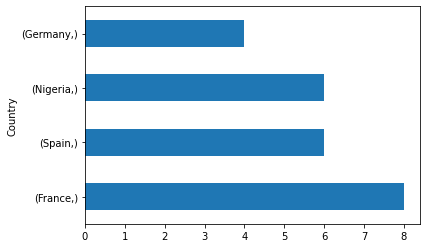

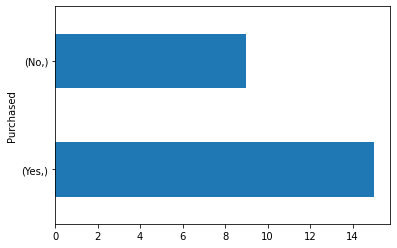

Country      0
Age          2
Salary       1
Purchased    0
dtype: int64

In [12]:
# Dropping categorical data rows with missing values
#dataset.dropna(how='any', subset=['Country', 'Purchased'], inplace=True)
# Replace null with the most frequent in that class
ax = df[['Country']].value_counts().plot(kind='barh')
plt.show()
ax = df[['Purchased']].value_counts().plot(kind='barh')
plt.show()
df['Country'] = df['Country'].fillna(df['Country'].value_counts().index[0])
df['Purchased'] = df['Purchased'].fillna(df['Purchased'].value_counts().index[0])
df.isnull().sum()

## Split the Dataset

In [13]:
# Splitting dataset into independent and dependent variable
X = df[['Country', 'Age', 'Salary']].values
y = df['Purchased'].values

In [14]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Nigeria' 18.0 15000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Nigeria' 50.0 60000.0]
 ['France' 22.0 30000.0]
 ['France' 44.0 45000.0]
 ['France' 47.0 78000.0]
 ['Nigeria' 35.0 43000.0]
 ['Spain' 34.0 44000.0]
 ['Spain' 33.0 48000.0]
 ['Nigeria' 29.0 77000.0]
 ['Spain' nan 57000.0]
 ['France' 44.0 48000.0]
 ['France' 37.0 23000.0]
 ['Germany' 45.0 50000.0]
 ['Nigeria' 30.0 30000.0]
 ['Nigeria' 29.0 15000.0]]


In [15]:
print(y)

['No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


### Replace Missing numerial data

We will use the capabilities of Scikit-learn to deal with missing values in the numerical fields.

In [16]:
# replacing the missing values in the age and salary column with the mean
# import the SimpleImputer class from the sklearn library
from sklearn.impute import SimpleImputer
# help(SimpleImputer)
print(X[:, 1:3])

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [18.0 15000.0]
 [40.0 nan]
 [35.0 58000.0]
 [nan 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]
 [50.0 60000.0]
 [22.0 30000.0]
 [44.0 45000.0]
 [47.0 78000.0]
 [35.0 43000.0]
 [34.0 44000.0]
 [33.0 48000.0]
 [29.0 77000.0]
 [nan 57000.0]
 [44.0 48000.0]
 [37.0 23000.0]
 [45.0 50000.0]
 [30.0 30000.0]
 [29.0 15000.0]]


In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [18]:
print(X[:, 1:3])

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [18.0 15000.0]
 [40.0 51541.666666666664]
 [35.0 58000.0]
 [36.78260869565217 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]
 [50.0 60000.0]
 [22.0 30000.0]
 [44.0 45000.0]
 [47.0 78000.0]
 [35.0 43000.0]
 [34.0 44000.0]
 [33.0 48000.0]
 [29.0 77000.0]
 [36.78260869565217 57000.0]
 [44.0 48000.0]
 [37.0 23000.0]
 [45.0 50000.0]
 [30.0 30000.0]
 [29.0 15000.0]]


## Convert Categorical Data

The optimization process can not handle categorical data.
There are two possibilities:
1. **Label enconding**: Label encoding is simply converting each value in a column to a number.
2. **One Hot enconding**: The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. 

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms.
For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life.
One Hot Encoding has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [19]:
# Handling Categorical Data
# One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('enconder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
print(X)

[[1.0 0.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 30.0 54000.0]
 [0.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 0.0 18.0 15000.0]
 [0.0 1.0 0.0 0.0 40.0 51541.666666666664]
 [1.0 0.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 0.0 1.0 36.78260869565217 52000.0]
 [1.0 0.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 0.0 50.0 60000.0]
 [1.0 0.0 0.0 0.0 22.0 30000.0]
 [1.0 0.0 0.0 0.0 44.0 45000.0]
 [1.0 0.0 0.0 0.0 47.0 78000.0]
 [0.0 0.0 1.0 0.0 35.0 43000.0]
 [0.0 0.0 0.0 1.0 34.0 44000.0]
 [0.0 0.0 0.0 1.0 33.0 48000.0]
 [0.0 0.0 1.0 0.0 29.0 77000.0]
 [0.0 0.0 0.0 1.0 36.78260869565217 57000.0]
 [1.0 0.0 0.0 0.0 44.0 48000.0]
 [1.0 0.0 0.0 0.0 37.0 23000.0]
 [0.0 1.0 0.0 0.0 45.0 50000.0]
 [0.0 0.0 1.0 0.0 30.0 30000.0]
 [0.0 0.0 1.0 0.0 29.0 15000.0]]


In [21]:
print(y)

['No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


In [22]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
print(y)

[0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0]


In [24]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
print(X_train)

[[0.0 1.0 0.0 0.0 50.0 83000.0]
 [0.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 0.0 1.0 34.0 44000.0]
 [1.0 0.0 0.0 0.0 22.0 30000.0]
 [0.0 1.0 0.0 0.0 45.0 50000.0]
 [0.0 0.0 1.0 0.0 18.0 15000.0]
 [1.0 0.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 0.0 40.0 51541.666666666664]
 [0.0 0.0 0.0 1.0 36.78260869565217 57000.0]
 [0.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 30.0 54000.0]
 [0.0 0.0 0.0 1.0 36.78260869565217 52000.0]
 [1.0 0.0 0.0 0.0 37.0 23000.0]
 [1.0 0.0 0.0 0.0 44.0 48000.0]
 [0.0 0.0 1.0 0.0 29.0 77000.0]
 [0.0 0.0 1.0 0.0 50.0 60000.0]
 [0.0 0.0 1.0 0.0 29.0 15000.0]
 [1.0 0.0 0.0 0.0 44.0 45000.0]
 [0.0 0.0 1.0 0.0 35.0 43000.0]
 [1.0 0.0 0.0 0.0 48.0 79000.0]]


In [26]:
print(X_test)

[[1.0 0.0 0.0 0.0 47.0 78000.0]
 [1.0 0.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 0.0 1.0 33.0 48000.0]
 [1.0 0.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 0.0 30.0 30000.0]]


In [27]:
print(y_train)

[0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1]


In [28]:
print(y_test)

[1 0 1 1 1]


## Data Scaling and Normalization 

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data. Let's talk a little more in-depth about each of these options.

### Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)

### Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

>[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution): Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:] = sc.fit_transform(X_train[:, 4:])

In [30]:
print(X_train)

[[0.0 1.0 0.0 0.0 1.554213388988272 1.765085337952789]
 [0.0 0.0 0.0 1.0 0.16979223242618383 0.5838126864044366]
 [0.0 0.0 0.0 1.0 -0.2916814864278456 -0.32898890797383584]
 [1.0 0.0 0.0 0.0 -1.6761026429899337 -1.0807078680500601]
 [0.0 1.0 0.0 0.0 0.9773712404207353 -0.006823639369739667]
 [0.0 0.0 1.0 0.0 -2.137576361843963 -1.8861210395603005]
 [1.0 0.0 0.0 0.0 0.05442380271267648 0.9059779550085327]
 [0.0 1.0 0.0 0.0 0.4005290918531985 0.0759549365910349]
 [0.0 0.0 0.0 1.0 0.029343709296696406 0.36903584066837253]
 [0.0 0.0 0.0 1.0 -1.099260494422397 -0.11421206223777172]
 [0.0 1.0 0.0 0.0 -0.753155205281875 0.20795320636632444]
 [0.0 0.0 0.0 1.0 0.029343709296696406 0.10056478349829238]
 [1.0 0.0 0.0 0.0 0.05442380271267648 -1.4565673480881725]
 [1.0 0.0 0.0 0.0 0.862002810707228 -0.11421206223777172]
 [0.0 0.0 1.0 0.0 -0.8685236349953823 1.442920069348693]
 [0.0 0.0 1.0 0.0 1.554213388988272 0.5301184749704206]
 [0.0 0.0 1.0 0.0 -0.8685236349953823 -1.8861210395603005]
 [1.0 0.0

In [31]:
print(X_test)

[[1.0 0.0 0.0 0.0 47.0 78000.0]
 [1.0 0.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 0.0 1.0 33.0 48000.0]
 [1.0 0.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 0.0 30.0 30000.0]]


In [32]:
X_test[:, 4:] = sc.transform(X_test[:, 4:])

In [33]:
print(X_test)

[[1.0 0.0 0.0 0.0 1.20810809984775 1.496614280782709]
 [1.0 0.0 0.0 0.0 0.862002810707228 1.1744490121786129]
 [0.0 0.0 0.0 1.0 -0.40704991614135294 -0.11421206223777172]
 [1.0 0.0 0.0 0.0 -0.17631305671433822 0.4227300521023885]
 [0.0 0.0 1.0 0.0 -0.753155205281875 -1.0807078680500601]]
